In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [13]:
company = pd.read_csv("C:/Users/SHIVAM/OneDrive/Desktop/Data science Assignment/Decision Trees/Company_Data.csv")

In [14]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [15]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [16]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

(array([ 6., 16., 47., 83., 89., 79., 40., 29.,  8.,  3.]),
 array([ 0.   ,  1.627,  3.254,  4.881,  6.508,  8.135,  9.762, 11.389,
        13.016, 14.643, 16.27 ]),
 <BarContainer object of 10 artists>)

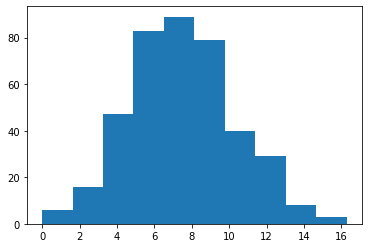

In [17]:
plt.hist(company['Sales'])

In [18]:
comp = pd.get_dummies(company,columns=['ShelveLoc','Urban','US'],drop_first=True)

In [19]:
conditions=[
    (comp['Sales']>=10),
    (comp['Sales']<=10) & (comp['Sales']>=5),
    (comp['Sales']<5)
]
values = ['High','Medium','Low']
comp['Sales']=np.select(conditions,values)

In [20]:
comp

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,Medium,138,73,11,276,120,42,17,0,0,1,1
1,High,111,48,16,260,83,65,10,1,0,1,1
2,High,113,35,10,269,80,59,12,0,1,1,1
3,Medium,117,100,4,466,97,55,14,0,1,1,1
4,Low,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,33,14,1,0,1,1
396,Medium,139,23,3,37,120,55,11,0,1,0,1
397,Medium,162,26,12,368,159,40,18,0,1,1,1
398,Medium,100,79,7,284,95,50,12,0,0,1,1


In [21]:
label_encoder = preprocessing.LabelEncoder()
comp['Sales']= label_encoder.fit_transform(comp['Sales']) 

In [22]:
comp

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,2,138,73,11,276,120,42,17,0,0,1,1
1,0,111,48,16,260,83,65,10,1,0,1,1
2,0,113,35,10,269,80,59,12,0,1,1,1
3,2,117,100,4,466,97,55,14,0,1,1,1
4,1,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,33,14,1,0,1,1
396,2,139,23,3,37,120,55,11,0,1,0,1
397,2,162,26,12,368,159,40,18,0,1,1,1
398,2,100,79,7,284,95,50,12,0,0,1,1


In [23]:
x = comp.iloc[:,1:11]
y = comp.iloc[:,0]

In [24]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes
0,138,73,11,276,120,42,17,0,0,1
1,111,48,16,260,83,65,10,1,0,1
2,113,35,10,269,80,59,12,0,1,1
3,117,100,4,466,97,55,14,0,1,1
4,141,64,3,340,128,38,13,0,0,1
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,0,1
396,139,23,3,37,120,55,11,0,1,0
397,162,26,12,368,159,40,18,0,1,1
398,100,79,7,284,95,50,12,0,0,1


In [25]:
y

0      2
1      0
2      0
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    2
Name: Sales, Length: 400, dtype: int32

In [26]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [30]:
max_features = 3
kfold = KFold(n_splits=10)
num_trees = 100

In [32]:
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [49]:
results = cross_val_score(model, x_train, y_train, cv=kfold)

In [50]:
print(results.mean())

0.690625


In [51]:
y_pred=model.predict(x_test)
np.mean(y_pred==y_test)

0.6625